It is important to compare the performance of multiple different machine learning algorithms consistently, and how you can create a test harness to compare multiple different machine learning algorithms in Python with scikit-learn.

* How to formulate an experiment to directly compare machine learning algorithms.
* A reusable template for evaluating the performance of multiple algorithms on one dataset.
* How to report and visualize the results when comparing algorithm performance.

### Choose The Best Machine Learning Model

When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross-validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.

When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from different perspectives. The same idea applies to model selection.
You should use a number of different ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies.

### Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

Six different classification algorithms are compared on a single dataset:
    
* Logistic Regression.
* Linear Discriminant Analysis.
* k-Nearest Neighbors.
* Classification and Regression Trees.
* Naive Bayes.
* Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Preview Dataset
import pandas as pd
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.data.csv', names = names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Import Libraries
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# Split dataset 
X = array[:,0:8]
Y = array[:,8]

In [7]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [12]:
# evaluate each model in turn
print("Running the example provides a list of each algorithm short name, the mean accuracy and \
the standard deviation accuracy.")
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy.
LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691285 (0.066354)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross-validation fold for each algorithm.


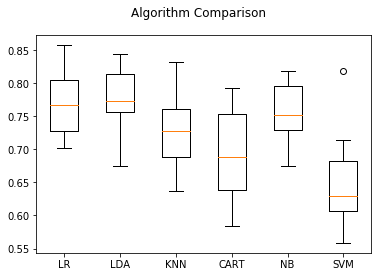

In [13]:
# boxplot algorithm comparison
print("The example also provides a box and whisker plot showing the spread of the accuracy scores \
across each cross-validation fold for each algorithm.")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Summary : From these results, it would suggest that both logistic regression and linear discriminant
analysis are perhaps worthy of further study on this problem.